# K-Nearest-Neigbors MNIST Classification

---

## Table of Contents
1. KNN Optimization Explained
3. Optimized Implimentation
4. Visualization
6. Comparison and Final Words

<br />


---

## Optimized Implimentation

Optimized with the Spotify's Annoy library for Approximate Nearest Neighbors.


In [9]:
# IMPORTS

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from mlxtend.data import loadlocal_mnist
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.evaluate import confusion_matrix

# Optimization Libraries
from annoy import AnnoyIndex


In [3]:
# Compile MNIST Dataset

X, y = loadlocal_mnist(images_path='./mnist_data/train-images-idx3-ubyte', labels_path='./mnist_data/train-labels-idx1-ubyte')

# Splitting our dataset into testing and training points.
train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.2)


In [6]:
class AnnoyKNN:
    def __init__(self, K = 3):
        self.K = K

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        self.m, self.n = np.shape(X_train)

    def predict(self, X_test):
        test_m, test_n = np.shape(X_test)

        # Initializes Annoy index / matrix
        matrix = AnnoyIndex(self.n, 'euclidean')

        # Constructing Annoy matrix
        for i in range(self.m):
            matrix.add_item(i, self.X_train[i])

        # Builds Annoy matrix
        matrix.build(self.K)

        # Building prediction matrix
        predictions = np.zeros(test_m)


        for i in range(test_m):
            # Compiles k nearest neighbors for each number / data point
            # in out testing data and returns their index
            index = matrix.get_nns_by_vector(X_test[i], self.K)

            # Given our indexes above, this is piece of code "votes"
            # and returns the majority nearest neighbor
            predictions[i] = np.argmax(np.bincount(self.y_train[index]))

        return predictions
    
    def accuracy_score(self, predictions, actual):
        num_predictions = len(predictions)
        
        predictions[predictions != actual] = 0
        predictions[predictions == actual] = 1

        num_correct = np.sum(predictions)

        accuracy = float(num_correct) / num_predictions
        
        print("Number of Predictions: {} | Accurary: {}".format(num_predictions, accuracy))
        
        

In [7]:
# Training on the entire vanilla MNIST dataset only takes about 15 second! 

model = AnnoyKNN(K = 3)
model.fit(train_data, train_labels)
predictions = model.predict(test_data)

# Computing confusion matrix for next slide
cm = confusion_matrix(y_target=test_labels, y_predicted=predictions, binary=False)

model.accuracy_score(predictions, test_labels)

Number of Predictions: 12000 | Accurary: 0.9545


## Analysis of Annoy Implimentation

Spotify's Approximate Nearest Neighbors Annoy library is exponentially quicker than the naive version. The accuracy is also quite impressive. Plotting a confusion matrix to get more detail about this:

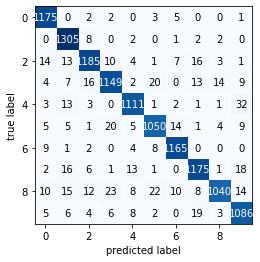

In [8]:
# Plotting confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=cm)

AUTHOR: RYAN P.